In [327]:
import pbpstats
import pandas as pd
from pbpstats.client import Client
from nba_api.stats.endpoints import playercareerstats, commonplayerinfo, playerprofilev2, boxscoretraditionalv2,\
leaguegamefinder, leaguestandings
from nba_api.stats.static import players
from nba_api.stats.static import teams
import pdb
import time
from alive_progress import alive_bar
import sqlalchemy
pd.options.display.max_rows = 999
pd.options.display.max_columns = 999

In [17]:

nba_teams = teams.get_teams()
# Select the dictionary for the Celtics, which contains their team ID
celtics = [team for team in nba_teams if team['abbreviation'] == 'BOS'][0]
celtics_id = celtics['id']
# Query for games where the Celtics were playing
gamefinder = leaguegamefinder.LeagueGameFinder(team_id_nullable=celtics_id)
# The first DataFrame of those returned is what we want.
games = gamefinder.get_data_frames()[0]
games.head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42021,1610612738,BOS,Boston Celtics,0042100406,2022-06-16,BOS vs. GSW,L,239,90,34,80,0.425,11,28,0.393,11,12,0.917,11,30,41,27,8,8,22,16,-13.0
1,42021,1610612738,BOS,Boston Celtics,0042100405,2022-06-13,BOS @ GSW,L,238,94,31,75,0.413,11,32,0.344,21,31,0.677,8,39,47,18,2,2,18,16,-10.0
2,42021,1610612738,BOS,Boston Celtics,0042100404,2022-06-10,BOS vs. GSW,L,241,97,34,85,0.400,15,38,0.395,14,19,0.737,11,31,42,22,8,6,15,17,-10.0
3,42021,1610612738,BOS,Boston Celtics,0042100403,2022-06-08,BOS vs. GSW,W,240,116,43,89,0.483,13,35,0.371,17,24,0.708,15,32,47,28,7,7,12,17,16.0
4,42021,1610612738,BOS,Boston Celtics,0042100402,2022-06-05,BOS @ GSW,L,242,88,30,80,0.375,15,37,0.405,13,17,0.765,6,37,43,24,5,7,18,18,-19.0


In [57]:
gamefinder = leaguegamefinder.LeagueGameFinder(league_id_nullable='00', season_nullable='2021-22')
# The first DataFrame of those returned is what we want.
games = gamefinder.get_data_frames()[0]

nba_league_id = '00'
seasons_to_season_id = {'2021-22_reg': 22021, '2021-22_off': 42021,
                        '2020-21': 22020,'2020-21_off': 42020,
                        '2019-20':22019,'2019-20_off': 42019,
                        '2018-19':22018,'2018-19_off': 42018,
                        '2017-18': 22017,'2017-18_off': 42017}
print (games.SEASON_ID.unique())
games.head()

['42021' '52021' '22021' '32021' '12021']


,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
0,42021,1610612738,BOS,Boston Celtics,0042100406,2022-06-16,BOS vs. GSW,L,239,90,34,80,0.425,11,28,0.393,11,12,0.917,11,30,41,27,8,8,22,16,-13.0
1,42021,1610612744,GSW,Golden State Warriors,0042100406,2022-06-16,GSW @ BOS,W,241,103,38,92,0.413,19,46,0.413,8,8,1.000,15,29,44,27,13,7,15,20,13.0
2,42021,1610612738,BOS,Boston Celtics,0042100405,2022-06-13,BOS @ GSW,L,238,94,31,75,0.413,11,32,0.344,21,31,0.677,8,39,47,18,2,2,18,16,-10.0
3,42021,1610612744,GSW,Golden State Warriors,0042100405,2022-06-13,GSW vs. BOS,W,240,104,41,88,0.466,9,40,0.225,13,15,0.867,4,35,39,23,9,2,6,28,10.0
4,42021,1610612738,BOS,Boston Celtics,0042100404,2022-06-10,BOS vs. GSW,L,241,97,34,85,0.400,15,38,0.395,14,19,0.737,11,31,42,22,8,6,15,17,-10.0


In [62]:
games[games.SEASON_ID=='32021'].head()

,SEASON_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_NAME,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS
880,32021,1610616833,DRT,Team Durant,0032100001,2022-02-20,DRT @ LBN,L,241,160,66,122,0.541,21,59,0.356,7,7,1.000,13,37,50,41,11,1,14,2,-3.0
881,32021,1610616834,LBN,Team LeBron,0032100001,2022-02-20,LBN vs. DRT,W,240,163,67,119,0.563,27,62,0.435,2,2,1.000,13,35,48,40,13,6,16,6,3.0
882,32021,1610616847,BAR,Team Barry,0032100006,2022-02-18,BAR @ IAH,W,5,25,9,17,0.529,4,7,0.571,3,4,0.750,1,9,10,9,2,3,4,3,5.0
883,32021,1610616849,IAH,Team Isiah,0032100006,2022-02-18,IAH vs. BAR,L,5,20,7,24,0.292,4,13,0.308,2,3,0.667,5,7,12,5,2,2,3,4,-5.0
884,32021,1610616850,WOR,Team Worthy,0032100004,2022-02-18,WOR @ IAH,L,5,49,20,36,0.556,8,21,0.381,1,4,0.250,5,10,15,12,3,1,5,4,-1.0


In [195]:
def get_home_away_team(x):
    firstsecond = str(x).replace('vs.','').replace('@','').replace(' ','')
    first, second = firstsecond[:3], firstsecond[3:]        
        
    if 'vs.' in x:
        # home first, away second
        return first, second
    else:
        # away first, home second
        return second, first          

small = games[(games.GAME_DATE == '2022-06-02') & (games.WL=='W')]
small['home_won'] = small.MATCHUP.apply(lambda x: 1 if 'vs.' in x else 0)
small['HOME_TEAM'] = small.MATCHUP.apply(lambda x: get_home_away_team(x)[0])
small['AWAY_TEAM'] = small.MATCHUP.apply(lambda x: get_home_away_team(x)[1])
cols = ['SEASON_ID', 'GAME_ID',
       'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT',
       'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB',
       'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PLUS_MINUS', 'home_away_won',
       'HOME_TEAM', 'AWAY_TEAM']
small[cols].head()

C:\Users\gabri\AppData\Local\Temp\ipykernel_14896\914010946.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['home_away_won'] = small.MATCHUP.apply(lambda x: 'HOME' if 'vs.' in x else 'AWAY')
C:\Users\gabri\AppData\Local\Temp\ipykernel_14896\914010946.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  small['HOME_TEAM'] = small.MATCHUP.apply(lambda x: get_home_away_team(x)[0])
C:\Users\gabri\AppData\Local\Temp\ipykernel_14896\914010946.py:15: SettingWithCopyWarning: 
A value is trying to be set 

,SEASON_ID,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,home_away_won,HOME_TEAM,AWAY_TEAM
11,42021,0042100401,2022-06-02,BOS @ GSW,W,242,120,43,85,0.506,21,41,0.512,13,16,0.813,7,32,39,33,7,6,12,13,12.0,AWAY,GSW,BOS


In [196]:
print(games.SEASON_ID.unique())
print(games[~games.SEASON_ID.str.startswith('120')].SEASON_ID.unique())

['42021' '52021' '22021' '32021' '12021']
['42021' '52021' '22021' '32021']


In [435]:
def get_games():
    g = []
    seasons = ['2021-22', '2020-21','2019-20','2018-19','2017-18']
    season_prefixes_to_remove = ['120', '320'] # summer league, all star
    for season in seasons:
        gamefinder = leaguegamefinder.LeagueGameFinder(league_id_nullable='00', season_nullable=season)
        # The first DataFrame of those returned is what we want.
        games = gamefinder.get_data_frames()[0]

        # filters
        games = games[~games.SEASON_ID.str.startswith('120')] # summer league
        games = games[~games.SEASON_ID.str.startswith('320')] # all star game
        games = games[(games.WL=='W')]
        
        games['home_won'] = games.MATCHUP.apply(lambda x: 1 if 'vs.' in x else 0)
        games['HOME_TEAM'] = games.MATCHUP.apply(lambda x: get_home_away_team(x)[0])
        games['AWAY_TEAM'] = games.MATCHUP.apply(lambda x: get_home_away_team(x)[1])
        games['season_first_year'] = games['SEASON_ID'].apply(lambda x: x[-2:])
        cols = ['SEASON_ID', 'GAME_ID', 'GAME_DATE', 'MATCHUP', 'WL', 'MIN', 'PTS', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
                'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 
                'PLUS_MINUS', 'home_won', 'HOME_TEAM', 'AWAY_TEAM','season_first_year']
        g.append(games[cols])
    return g

In [436]:
all_games = get_games()

In [437]:
df = pd.concat(all_games)

In [439]:
print (df.season_first_year.unique())
df.head()

['21' '20' '19' '18' '17']


,SEASON_ID,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,home_won,HOME_TEAM,AWAY_TEAM,season_first_year
1,42021,0042100406,2022-06-16,GSW @ BOS,W,241,103,38,92,0.413,19,46,0.413,8,8,1.000,15,29,44,27,13,7,15,20,13.0,0,BOS,GSW,21
3,42021,0042100405,2022-06-13,GSW vs. BOS,W,240,104,41,88,0.466,9,40,0.225,13,15,0.867,4,35,39,23,9,2,6,28,10.0,1,GSW,BOS,21
5,42021,0042100404,2022-06-10,GSW @ BOS,W,241,107,40,91,0.440,15,43,0.349,12,15,0.800,16,39,55,20,10,5,16,21,10.0,0,BOS,GSW,21
6,42021,0042100403,2022-06-08,BOS vs. GSW,W,240,116,43,89,0.483,13,35,0.371,17,24,0.708,15,32,47,28,7,7,12,17,16.0,1,BOS,GSW,21
9,42021,0042100402,2022-06-05,GSW vs. BOS,W,241,107,39,86,0.453,15,37,0.405,14,20,0.700,6,36,42,25,15,2,12,17,19.0,1,GSW,BOS,21


## Player stats

In [440]:
engine = sqlalchemy.create_engine('sqlite:///../nba_manager.db')

In [441]:
players = pd.read_sql_table('players',engine)
teams = pd.read_sql_table('teams',engine)

In [442]:
small_players = players[(players.year_drafted == 2021) & (players.team_id.isin([1,18]))]

In [443]:
teams.head()

,id,name,short_name,conference,division
0,1,Boston Celtics,BOS,EAST,ATLANTIC
1,2,Brooklyn Nets,BKN,EAST,ATLANTIC
2,3,New York Knicks,NYK,EAST,ATLANTIC
3,4,Philadelphia 76ers,PHI,EAST,ATLANTIC
4,5,Toronto Raptors,TOR,EAST,ATLANTIC


In [444]:
team_players = pd.merge(small_players, teams[['id','name']], left_on='team_id', right_on='id', suffixes=['_player','_team'])

In [445]:
players.head(30)

,id,name,team_id,year_drafted,points_per_game,rebounds_per_game,assists_per_game,simulation_id,age
0,1,Miles Bridges,12,2021,19.670732,6.817073,3.658537,None,24
1,2,Miles Bridges,12,2020,10.243902,4.841463,1.792683,None,23
2,3,Miles Bridges,12,2019,10.280488,4.414634,1.390244,None,22
3,4,Miles Bridges,12,2018,7.280488,3.939024,1.158537,None,21
4,5,Kelly Oubre Jr.,12,2021,13.865854,3.682927,1.024390,None,26
5,6,LaMelo Ball,12,2021,18.390244,6.109756,6.963415,None,20
6,7,LaMelo Ball,12,2020,9.792683,3.682927,3.817073,None,19
7,8,Mason Plumlee,12,2021,5.817073,6.890244,2.756098,None,32
8,9,Terry Rozier,12,2021,17.170732,3.841463,3.975610,None,28
9,10,Terry Rozier,12,2020,17.158537,3.682927,3.573171,None,27


In [446]:
def get_top_n_scorers_from_team(players, team_id,n=3, season=2021):
    return get_in_sorted_order(players, team_id, 'points_per_game', n, season)

def get_top_n_rebounders_from_team(players, team_id,n=3, season=2021):
    return get_in_sorted_order(players, team_id, 'rebounds_per_game', n, season)

def get_in_sorted_order(players, team_id, col_name, n, season):
    df = players[(players.team_id==team_id) & (players.year_drafted == season)]\
    .sort_values(col_name, ascending=False).head(n)
    #print (df)
    return df[col_name].values

In [447]:
get_in_sorted_order(players, team_id, 'points_per_game', 3, 2020)

array([13.73170732, 11.47560976, 11.35365854])

In [448]:
n_scorers = 5
get_top_n_scorers_from_team(players, team_id=1, n=n_scorers)

array([24.95121951, 19.01219512, 10.5       ,  8.54878049,  7.40243902])

In [449]:
d2 = []
for season in range(2017,2022):
    for team_id in teams.id.values:
        scorers = get_top_n_scorers_from_team(players, team_id, n=n_scorers, season=season)
        rebounders = get_top_n_rebounders_from_team(players, team_id, n=n_scorers, season=season)
        temp_dict = dict(team_id=team_id, season=season)            
        for scorer_num in range(n_scorers):
            temp_dict['scorer{}'.format(scorer_num+1)] = scorers[scorer_num]
        for scorer_num in range(n_scorers):
            temp_dict['rebounder{}'.format(scorer_num+1)] = rebounders[scorer_num]
        d2.append(temp_dict)
scorer_df = pd.DataFrame(d2)
scorer_df = pd.merge(scorer_df, teams[['id','short_name']], left_on='team_id', right_on='id').set_index(['short_name', 'season'])

In [450]:
scorer_df.head()

team_id    scorer1    scorer2    scorer3    scorer4  \
short_name season                                                        
BOS        2017          1  17.878049  13.560976  12.402439  11.304878   
           2018          1  19.463415  15.158537  12.756098  11.756098   
           2019          1  18.865854  14.134146  13.963415  11.085366   
           2020          1  20.634146  17.439024  10.109756   7.646341   
           2021          1  24.951220  19.012195  10.500000   8.548780   

                     scorer5  rebounder1  rebounder2  rebounder3  rebounder4  \
short_name season                                                              
BOS        2017    10.975610    6.475610    4.902439    4.585366    4.219512   
           2018    11.280488    5.817073    5.585366    5.585366    4.085366   
           2019     9.463415    5.609756    5.256098    5.195122    4.439024   
           2020     6.219512    5.756098    5.353659    4.365854    4.231707   
           2021     7.402439    7.426829    7.170732    6.463415    4.926829   

                   rebounder5  id  
short_name season                  
BOS        2017      3.524390   1  
           2018      3.926829   1  
           2019      4.243902   1  
           2020      2.170732   1  
           2021      3.341463   1

In [451]:
scorer_df.loc[('BOS',2017),'scorer1']

17.878048780487806

In [455]:
for scorer_num in range(n_scorers):
    df['home_scorer_{}'.format(scorer_num+1)] = df.apply(lambda x: scorer_df.loc[(x['HOME_TEAM'],int(x['season_first_year'])+2000),\
                                      'scorer{}'.format(scorer_num+1)],axis=1)
    df['home_rebounder_{}'.format(scorer_num+1)] = df.apply(lambda x: scorer_df.loc[(x['HOME_TEAM'],int(x['season_first_year'])+2000),\
                                      'rebounder{}'.format(scorer_num+1)],axis=1)
    
    df['away_scorer_{}'.format(scorer_num+1)] = df.apply(lambda x: scorer_df.loc[(x['AWAY_TEAM'],int(x['season_first_year'])+2000),\
                                      'scorer{}'.format(scorer_num+1)],axis=1)
    df['away_rebounder_{}'.format(scorer_num+1)] = df.apply(lambda x: scorer_df.loc[(x['AWAY_TEAM'],int(x['season_first_year'])+2000),\
                                      'rebounder{}'.format(scorer_num+1)],axis=1)

df.head()

,SEASON_ID,GAME_ID,GAME_DATE,MATCHUP,WL,MIN,PTS,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PF,PLUS_MINUS,home_won,HOME_TEAM,AWAY_TEAM,season_first_year,home_scorer_1,home_rebounder_1,away_scorer_1,home_scorer_2,home_rebounder_2,away_scorer_2,home_scorer_3,home_rebounder_3,away_scorer_3,home_scorer_4,home_rebounder_4,away_scorer_4,home_scorer_5,home_rebounder_5,away_scorer_5,away_rebounder_1,away_rebounder_2,away_rebounder_3,away_rebounder_4,away_rebounder_5
1,42021,0042100406,2022-06-16,GSW @ BOS,W,241,103,38,92,0.413,19,46,0.413,8,8,1.000,15,29,44,27,13,7,15,20,13.0,0,BOS,GSW,21,24.951220,7.426829,19.878049,19.012195,7.170732,17.134146,10.500000,6.463415,15.317073,8.54878,4.926829,7.95122,7.402439,3.341463,7.951220,7.268293,4.414634,4.097561,4.085366,3.963415
3,42021,0042100405,2022-06-13,GSW vs. BOS,W,240,104,41,88,0.466,9,40,0.225,13,15,0.867,4,35,39,23,9,2,6,28,10.0,1,GSW,BOS,21,19.878049,7.268293,24.951220,17.134146,4.414634,19.012195,15.317073,4.097561,10.500000,7.95122,4.085366,8.54878,7.951220,3.963415,7.402439,7.426829,7.170732,6.463415,4.926829,3.341463
5,42021,0042100404,2022-06-10,GSW @ BOS,W,241,107,40,91,0.440,15,43,0.349,12,15,0.800,16,39,55,20,10,5,16,21,10.0,0,BOS,GSW,21,24.951220,7.426829,19.878049,19.012195,7.170732,17.134146,10.500000,6.463415,15.317073,8.54878,4.926829,7.95122,7.402439,3.341463,7.951220,7.268293,4.414634,4.097561,4.085366,3.963415
6,42021,0042100403,2022-06-08,BOS vs. GSW,W,240,116,43,89,0.483,13,35,0.371,17,24,0.708,15,32,47,28,7,7,12,17,16.0,1,BOS,GSW,21,24.951220,7.426829,19.878049,19.012195,7.170732,17.134146,10.500000,6.463415,15.317073,8.54878,4.926829,7.95122,7.402439,3.341463,7.951220,7.268293,4.414634,4.097561,4.085366,3.963415
9,42021,0042100402,2022-06-05,GSW vs. BOS,W,241,107,39,86,0.453,15,37,0.405,14,20,0.700,6,36,42,25,15,2,12,17,19.0,1,GSW,BOS,21,19.878049,7.268293,24.951220,17.134146,4.414634,19.012195,15.317073,4.097561,10.500000,7.95122,4.085366,8.54878,7.951220,3.963415,7.402439,7.426829,7.170732,6.463415,4.926829,3.341463


## Predictions

In [456]:
from fastai.tabular.all import *

In [477]:
cont_names = ['home_scorer_{}'.format(i+1) for i in range(n_scorers)] + \
                ['away_scorer_{}'.format(i+1) for i in range(n_scorers)] + \
            ['home_rebounder_{}'.format(i+1) for i in range(n_scorers)] + \
                ['away_rebounder_{}'.format(i+1) for i in range(n_scorers)]
eligible_cols = ['home_won'] + cont_names
clean_df = df[eligible_cols]
clean_df.head()

,home_won,home_scorer_1,home_scorer_2,home_scorer_3,home_scorer_4,home_scorer_5,away_scorer_1,away_scorer_2,away_scorer_3,away_scorer_4,away_scorer_5,home_rebounder_1,home_rebounder_2,home_rebounder_3,home_rebounder_4,home_rebounder_5,away_rebounder_1,away_rebounder_2,away_rebounder_3,away_rebounder_4,away_rebounder_5
1,0,24.951220,19.012195,10.500000,8.54878,7.402439,19.878049,17.134146,15.317073,7.95122,7.951220,7.426829,7.170732,6.463415,4.926829,3.341463,7.268293,4.414634,4.097561,4.085366,3.963415
3,1,19.878049,17.134146,15.317073,7.95122,7.951220,24.951220,19.012195,10.500000,8.54878,7.402439,7.268293,4.414634,4.097561,4.085366,3.963415,7.426829,7.170732,6.463415,4.926829,3.341463
5,0,24.951220,19.012195,10.500000,8.54878,7.402439,19.878049,17.134146,15.317073,7.95122,7.951220,7.426829,7.170732,6.463415,4.926829,3.341463,7.268293,4.414634,4.097561,4.085366,3.963415
6,1,24.951220,19.012195,10.500000,8.54878,7.402439,19.878049,17.134146,15.317073,7.95122,7.951220,7.426829,7.170732,6.463415,4.926829,3.341463,7.268293,4.414634,4.097561,4.085366,3.963415
9,1,19.878049,17.134146,15.317073,7.95122,7.951220,24.951220,19.012195,10.500000,8.54878,7.402439,7.268293,4.414634,4.097561,4.085366,3.963415,7.426829,7.170732,6.463415,4.926829,3.341463


In [478]:
clean_df['home_won']

1       0
3       1
5       0
6       1
9       1
       ..
2616    0
2617    1
2618    0
2624    0
2626    1
Name: home_won, Length: 6261, dtype: int64

In [481]:
splits = RandomSplitter(valid_pct=0.2)(range_of(clean_df))

In [482]:
to = TabularPandas(clean_df, procs=[Categorify, FillMissing,Normalize],
                   cat_names = [],
                   cont_names = cont_names,
                   y_names='home_won',
                   y_block=CategoryBlock,
                   splits=splits)

In [484]:
dls = to.dataloaders(bs=64)

In [485]:
learn = tabular_learner(dls, metrics=[accuracy, error_rate])

In [486]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.665484,0.664149,0.628594,0.371406,00:00


In [487]:
learn.show_results()

,home_scorer_1,home_scorer_2,home_scorer_3,home_scorer_4,home_scorer_5,away_scorer_1,away_scorer_2,away_scorer_3,away_scorer_4,away_scorer_5,home_rebounder_1,home_rebounder_2,home_rebounder_3,home_rebounder_4,home_rebounder_5,away_rebounder_1,away_rebounder_2,away_rebounder_3,away_rebounder_4,away_rebounder_5,home_won,home_won_pred
0,0.122606,-0.750444,-0.083055,0.864926,0.550944,1.751548,0.232523,0.606170,1.337709,0.688592,-0.230122,1.092161,-0.019532,0.666399,0.781196,0.848682,0.160842,0.461202,0.208978,0.751155,0.0,0.0
1,0.346617,0.874788,0.144196,1.010399,1.503023,0.874871,0.558365,-0.208467,-0.226648,-0.507655,0.185852,0.289259,1.123870,1.678879,0.914570,1.664252,0.170745,0.005493,0.179339,-0.500350,1.0,1.0
2,-1.255485,-0.708878,-0.162100,-0.618898,0.100559,-0.571223,0.132263,0.541595,0.403679,1.038438,-0.446212,-0.166709,0.668968,-0.569421,-0.669247,-0.428329,-0.532343,0.424253,0.549836,1.327506,0.0,0.0
3,0.394821,-0.164363,0.178778,1.039493,-0.321320,-0.714987,-0.569550,-0.387289,-0.324063,0.316176,0.450562,-1.286807,-0.535908,-0.256744,0.531120,-0.519544,0.319285,0.744481,0.060780,0.174804,0.0,1.0
4,-1.896326,-1.324055,-0.745051,-0.665449,-0.811612,0.587343,-1.263009,-0.898921,-0.622035,-0.281948,0.709871,-0.513642,-0.966221,-1.879689,-1.669552,-1.222437,-1.532509,-1.189204,-1.050714,-0.533284,1.0,0.0
5,-0.572111,-1.294959,-1.066168,-0.682906,-0.195896,-0.720625,0.245055,-0.282976,-0.289681,-0.033670,-1.121494,-0.206359,-0.425256,-0.316301,0.414417,1.068671,-1.017572,-0.388633,0.238618,0.784089,1.0,0.0
6,3.530971,-0.309844,0.702446,0.667083,-0.332722,0.401296,-0.185224,0.407478,0.460981,-0.637437,1.104236,0.755141,1.554183,-0.509863,-1.686224,0.151155,-1.245333,-0.745811,-1.969548,-1.603651,0.0,1.0
7,-0.302731,-0.318157,0.277584,0.789280,1.371899,0.564792,0.666978,0.367740,0.460981,0.451600,-0.608280,-0.394694,0.287834,0.696178,0.664494,1.975456,-1.156209,-0.561064,-0.161519,-0.006335,1.0,1.0
8,0.621668,1.132497,1.902930,-0.106833,-1.569855,-1.512735,-0.932989,-0.412126,-0.054741,0.541883,-0.586671,0.219873,-0.929337,-0.569421,-0.052392,-0.728803,0.566851,0.510468,0.401637,0.701753,1.0,1.0


In [488]:
row, clas, probs = learn.predict(clean_df.iloc[0])
print (row)
print (clas, probs)

   home_scorer_1  home_scorer_2  home_scorer_3  home_scorer_4  home_scorer_5  \
0       1.341905       1.539844      -0.493097      -0.525795      -0.298516   

   away_scorer_1  away_scorer_2  away_scorer_3  away_scorer_4  away_scorer_5  \
0       0.170147       0.909272       1.475447      -0.805403      -0.044956   

   home_rebounder_1  home_rebounder_2  home_rebounder_3  home_rebounder_4  \
0         -0.186904          1.449007           2.18121          1.559764   

   home_rebounder_5  away_rebounder_1  away_rebounder_2  away_rebounder_3  \
0          0.414418          -0.25663         -0.779908          -0.19157   

   away_rebounder_4  away_rebounder_5  home_won  
0          0.535016          1.261637       1.0  
tensor(1) tensor([0.2338, 0.7662])


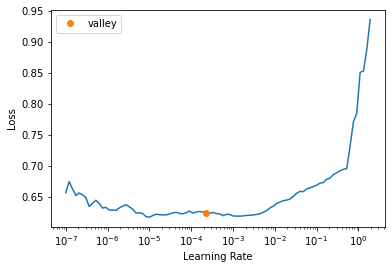

In [489]:
x = learn.lr_find()

In [490]:
learn.fit_one_cycle(20, lr_max=x)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.626819,0.660891,0.627796,0.372204,00:00
1,0.626959,0.655357,0.621406,0.378594,00:00
2,0.621986,0.655004,0.611022,0.388978,00:00
3,0.617879,0.653892,0.621406,0.378594,00:00
4,0.609191,0.654498,0.633387,0.366613,00:00
5,0.606315,0.655632,0.622204,0.377796,00:00
6,0.601022,0.662082,0.630990,0.369010,00:00
7,0.598456,0.657969,0.616613,0.383387,00:00
8,0.591625,0.658604,0.607029,0.392971,00:00
9,0.587341,0.659840,0.602236,0.397764,00:00


In [491]:
# method for later usage inside game simulator
learn.predict(clean_df.iloc[0])

(   home_scorer_1  home_scorer_2  home_scorer_3  home_scorer_4  home_scorer_5  \
 0       1.341905       1.539844      -0.493097      -0.525795      -0.298516   
 
    away_scorer_1  away_scorer_2  away_scorer_3  away_scorer_4  away_scorer_5  \
 0       0.170147       0.909272       1.475447      -0.805403      -0.044956   
 
    home_rebounder_1  home_rebounder_2  home_rebounder_3  home_rebounder_4  \
 0         -0.186904          1.449007           2.18121          1.559764   
 
    home_rebounder_5  away_rebounder_1  away_rebounder_2  away_rebounder_3  \
 0          0.414418          -0.25663         -0.779908          -0.19157   
 
    away_rebounder_4  away_rebounder_5  home_won  
 0          0.535016          1.261637       1.0  ,
 tensor(1),
 tensor([0.3181, 0.6819]))

In [492]:
clean_df.to_csv('df_training_ml.csv',index=False)

In [493]:
Learner.save(learn, 'model2')

Path('models/model2.pth')

In [494]:
learn.export('../models/model_gs.pt')